# Homework 3: Classification using Neural Networks[5 points]


### HIDS 7006, Spring 2025

### Due: Thursday, March 27, 2025 11:59 pm E.T.

This homework will test your knowledge about  Classification using Neural Networks that you learned in lectures 6 and 7. Fill in the code/answers for the questions as indicated below.

Please edit this document directly using Jupyter or Google Colab and answer each of the questions in-line as indicated.

Turn in a single document i.e. the Notebook showing all of your code and output for the entire assignment, with each question clearly demarcated. Submit your completed assignment through Canvas. The notebook can be downloaded by clicking the `File` option (top left) and clicking `Download .ipynb` in the drop down menu.

## 1. Chronic Heart Disease (CHD) Prediction  [5 points]

**Dataset**

We will be using the Heart Disease dataset from the UCI Machine Learning Repository for this homework.



Specifically, we will be using one of the processed datasets from Cleveland, which has 14 attributes (most important ones used in other scientific works) from the total 76 features.

The dataset comprises 303 observations, 13 features, and 1 target attribute. The 13 features include the results of non-invasive diagnostic tests along with other relevant patient information. The target variable includes the result of the invasive coronary angiogram which represents the presence or absence of coronary artery disease in the patient with 0 representing the absence of CHD and labels 1-4 representing the presence of CHD.

Full details of attributes can be found here:

Link: https://archive.ics.uci.edu/ml/datasets/heart+disease

The file can be downloaded from Canvas: Files/Homeworks/Homework3/



You need to develop a binary-class Neural Network (NN) classifier to predict the CHD outcome. For this, you will create, train and test a neural network architecture using **Keras**.

You should refer to "Neural Network using Keras" from Lecture 7 (`7_neural_network_solved.ipynb`) on how to create a NN architecture for Keras.


**Steps**

1. Read the dataset using Pandas.

2. The outcome column in this dataset is `num`, which has values 0, 1, 2, 3.
Create a new binary outcome column `binary_num` indicating the presence (1) or absence (0) of coronary artery disease in the patient. The `num` column with 0 represents the absence of CHD while labels 1-4 represents the presence of CHD. Remove the old multi-class outcome column `num` after you have created the new binary outcome column.  How many positive and negative outcomes are there for the newly create binary column `binary_num`? Divide the dataset into feature matrix (X) and outcome arrays (y).

3. Perform any required data preprocessing of the features (X). This might include missing value imputation, normalization, and handling categorical columns. For example: Refer to the documentation from UCI to determine which columns are categorical and need to be one-hot encoded.


2. Split the dataset into training and test sets. Use a split of your choice (e.g. 80/20 or 70/30)


3. Create a Neural Network architecture (NN) of your chouse (number of hidden layers and units) for this classification problem using Keras. The NN architecture should have at least one hidden layer.

4. Compile the network and output the structure of the network. Explain the number of parameters in each layer.

5. Train the model using a validation split (0.1 or 0.2). Determine if after some epochs the validation loss is increasing or not.

6. Test the model on the test set and print the classification report.

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Read in data set
df = pd.read_csv('/content/drive/MyDrive/chd_processed_cleveland.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# Create binary outcome: 0 = no CHD, 1-4 = CHD
df['binary_num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Drop original multi-class target
df.drop('num', axis=1, inplace=True)

# Count of binary outcomes
df['binary_num'].value_counts()


,count
binary_num,
0,164
1,139


In [7]:
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal', 'ca'], drop_first=True)

# Split features and label
X = df.drop('binary_num', axis=1)
y = df['binary_num']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test, stratify to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
from keras.models import Sequential
from keras.layers import Dense

# Define neural network
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classifier

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5579 - loss: 0.7558 - val_accuracy: 0.6122 - val_loss: 0.7178
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6523 - loss: 0.7123 - val_accuracy: 0.6531 - val_loss: 0.6776
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7031 - loss: 0.6662 - val_accuracy: 0.7143 - val_loss: 0.6437
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7316 - loss: 0.5961 - val_accuracy: 0.7347 - val_loss: 0.6176
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7533 - loss: 0.5684 - val_accuracy: 0.7551 - val_loss: 0.5907
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7669 - loss: 0.5384 - val_accuracy: 0.7959 - val_loss: 0.5705
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7844 - loss: 0.4816 - val_accuracy: 0.7755 - val_loss: 0.5495
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7600 - loss: 0.4794 - val_accuracy: 0.7959 -

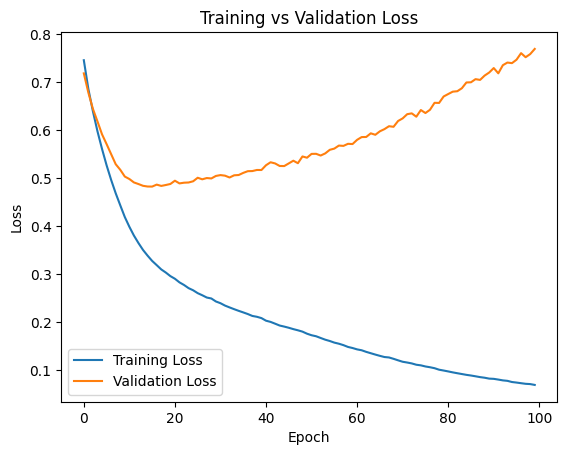

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [12]:
from sklearn.metrics import classification_report

# Predict on test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Print performance report
print(classification_report(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        33
           1       0.72      0.75      0.74        28

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

